In [88]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 1. 데이터 생성
- 남,여 키와 몸무게 데이터를 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.randint(140,195)

174

In [69]:
data = []
for i in range(50):
    #여자 데이터 data추가
    data.append([random.randint(40,70),random.randint(140,170)])
    #남자 데이터 data 추가
    data.append([random.randint(60,95),random.randint(160,195)])
#data

In [70]:
# 여자 
# for femail in data[::2]:
#     print(femail,end=' ')
print('여자 : ',[ femail for femail in data[::2]])
print('남자 : ',[ mail for mail in data[1::2]])
print('=========================================================================================================================================================================')
print('여자 몸무게(x축) :',[femail[0] for femail in data[::2]])
print('여자 키(y축) :',[femail[1] for femail in data[::2]])
print('남자 몸무게(x축) : ',[ mail[0] for mail in data[1::2]])
print('남자 키(y축) : ',[ mail[1] for mail in data[1::2]])

여자 :  [[57, 146], [64, 149], [56, 163], [57, 161], [50, 163], [53, 169], [62, 163], [65, 153], [44, 149], [53, 168], [59, 163], [61, 152], [69, 150], [60, 153], [55, 170], [52, 156], [55, 167], [66, 143], [64, 165], [45, 142], [51, 165], [57, 160], [50, 163], [53, 150], [51, 166], [60, 146], [40, 153], [42, 167], [56, 159], [45, 155], [64, 148], [41, 170], [63, 164], [64, 146], [49, 148], [53, 148], [54, 162], [65, 140], [43, 167], [63, 143], [55, 140], [43, 146], [68, 159], [51, 170], [62, 161], [44, 158], [63, 164], [45, 153], [61, 146], [70, 152]]
남자 :  [[87, 185], [64, 176], [79, 169], [84, 193], [70, 176], [67, 166], [61, 183], [62, 177], [62, 171], [90, 174], [61, 170], [95, 194], [69, 183], [72, 163], [73, 175], [68, 185], [95, 174], [88, 187], [87, 167], [88, 183], [61, 195], [62, 181], [81, 174], [89, 181], [73, 181], [87, 195], [91, 175], [79, 177], [67, 163], [68, 188], [74, 195], [88, 194], [63, 182], [63, 192], [76, 162], [89, 178], [65, 182], [92, 179], [78, 181], [79, 17

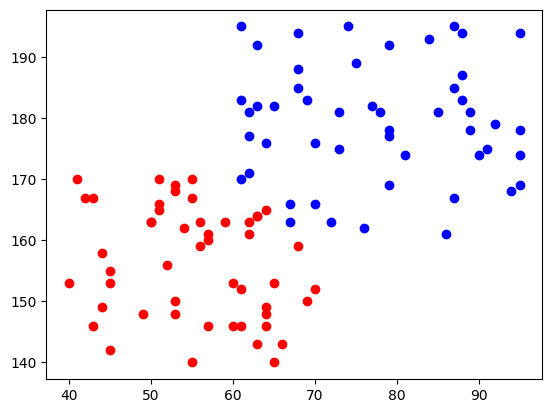

In [71]:
# realdata 그래프
plt.plot([femail[0] for femail in data[::2]],
         [femail[1] for femail in data[::2]],'o', color='r')
plt.plot([mail[0] for mail in data[1::2]],
        [mail[1] for mail in data[1::2]],'o',color='b')
plt.show()

# 2. 군집화 로직 

In [31]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(40,95),random.randint(140,195)],
    [random.randint(40,95),random.randint(140,195)]
]
random_points

[[42, 192], [44, 174]]

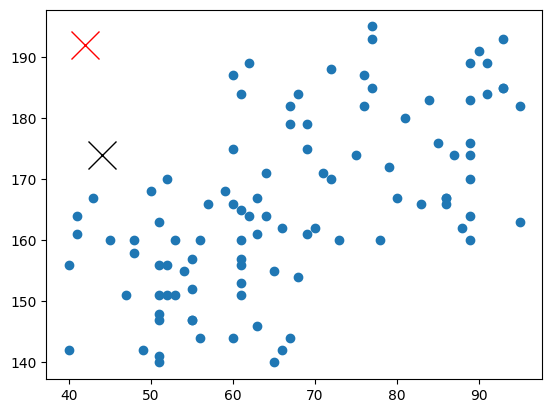

In [33]:
plt.plot([d[0] for d in data],
        [d[1] for d in data],'o')
plt.plot(random_points[0][0],
        random_points[0][1],'x',color='r',markersize=20)  # 기준점0(random_points[0])
plt.plot(random_points[1][0],
        random_points[1][1],'x',color='k',markersize=20)  # 기준점1(random_points[1])

In [35]:
# 두 점 거리를 return / a:[0,0]
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
print(dist([0,0],[3,4]))
print(dist(random_points[0],data[0]))
print(dist(random_points[1],data[0]))

5.0
25.019992006393608
7.0710678118654755


In [36]:
# random_points[0]에 가까운 그룹과  random_points[1]에 가까운  그룹을 분류
group0 = []
group1 = []
for d in data:
    if dist(random_points[0],d) <dist(random_points[1],d):
        group0.append(d)
    else:
        group1.append(d)
len(group0),len(group1)

(10, 90)

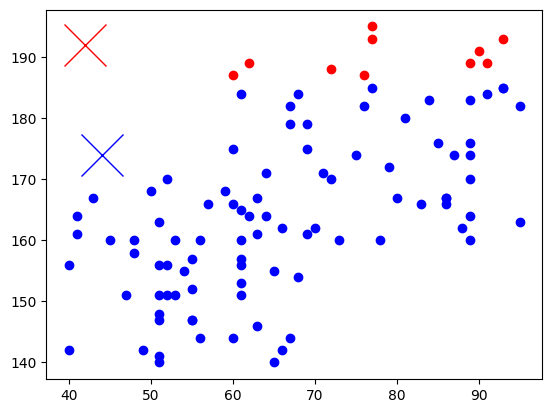

In [39]:
# group0 과 group1, 기준점0,기준점1
plt.plot([d[0] for d in group0],
        [d[1] for d in group0],'o',color='r')
plt.plot(random_points[0][0],
        random_points[0][1],'x',color='r',markersize=30)
plt.plot([d[0] for d in group1],
        [d[1] for d in group1],'o',color='b')
plt.plot(random_points[1][0],
        random_points[1][1],'x',color='b',markersize=30)

In [48]:
# 기준점 이동 : group0의 중심점(기준점0), group1의 중심점(기준점1)
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] =[group0_meanX,group0_meanY]

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] =[group1_meanX,group1_meanY]
random_points

[[78.7, 190.1], [65.81111111111112, 163.0]]

In [40]:
a=[1,2,3,4]
np.mean(a)

2.5

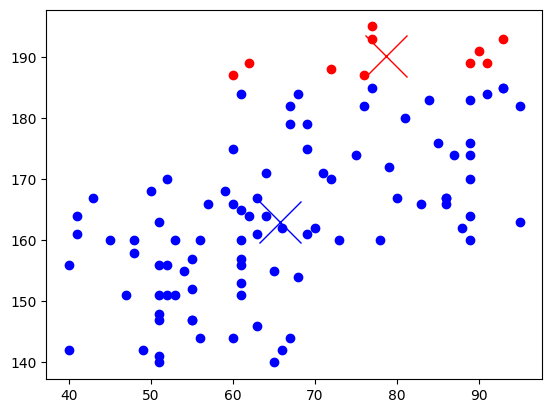

In [49]:
# group0 과 group1, 기준점0,기준점1
plt.plot([d[0] for d in group0],
        [d[1] for d in group0],'o',color='r')
plt.plot(random_points[0][0],
        random_points[0][1],'x',color='r',markersize=30)
plt.plot([d[0] for d in group1],
        [d[1] for d in group1],'o',color='b')
plt.plot(random_points[1][0],
        random_points[1][1],'x',color='b',markersize=30)

# 3. 군집화 전체코드(for문 이용)
- 랜덤포인트 2개 지정
- 랜덤포인트 2개 시각화(x
- for 문
    * 랜덤포인트 2지점 기준으로 group0과 group1로 나눔
    * 랜덤포인트 출력
    * group0의 중간점과 group1의 중간점을 랜덤포인트로 업데이트
    * 랜덤포인트 출력과 시각화

초기 기준점 : [[46, 164], [58, 193]]
1 번째 points : [[57.48275862068966, 157.51724137931035], [78.80952380952381, 181.95238095238096]]
2 번째 points : [[56.98245614035088, 157.4561403508772], [78.97674418604652, 181.46511627906978]]
3 번째 points : [[56.98245614035088, 157.4561403508772], [78.97674418604652, 181.46511627906978]]
4 번째 points : [[56.98245614035088, 157.4561403508772], [78.97674418604652, 181.46511627906978]]
5 번째 points : [[56.98245614035088, 157.4561403508772], [78.97674418604652, 181.46511627906978]]
6 번째 points : [[56.98245614035088, 157.4561403508772], [78.97674418604652, 181.46511627906978]]
7 번째 points : [[56.98245614035088, 157.4561403508772], [78.97674418604652, 181.46511627906978]]
8 번째 points : [[56.98245614035088, 157.4561403508772], [78.97674418604652, 181.46511627906978]]
9 번째 points : [[56.98245614035088, 157.4561403508772], [78.97674418604652, 181.46511627906978]]


(140.0, 195.0)

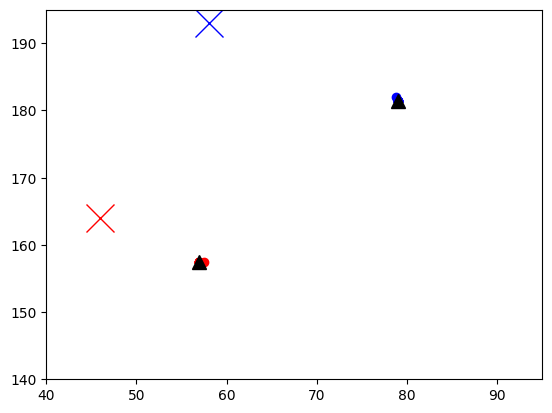

In [75]:
points = [
    [random.randint(40,95),random.randint(140,195)],
    [random.randint(40,95),random.randint(140,195)]
]
print('초기 기준점 :',points)
plt.plot(points[0][0],points[0][1], 'x', color='r',markersize=20)
plt.plot(points[1][0],points[1][1], 'x', color='b',markersize=20)
for i in range(1,10):
    # 랜덤포인트 2지점 기준으로 group0과 group1로 나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(d,points[0]) < dist(d,points[1]):
            group0.append(d)
        else:
            group1.append(d)
    
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X = np.mean([d[0] for d in group0])
    group0_mean_Y = np.mean([d[1] for d in group0])
    points[0] = [group0_mean_X,group0_mean_Y]
    group1_mean_X = np.mean([d[0] for d in group1])
    group1_mean_Y = np.mean([d[1] for d in group1])
    points[1] = [group1_mean_X,group1_mean_Y]
    
    # 포인트 출력
    print(i,'번째 points :',points)
    plt.plot(points[0][0],points[0][1], 'o', color='r')
    plt.plot(points[1][0],points[1][1], 'o', color='b')
    
plt.plot(points[0][0],points[0][1], '^', color='k',markersize=10)
plt.plot(points[1][0],points[1][1], '^', color='k',markersize=10)
plt.xlim([40,95])
plt.ylim([140,195])

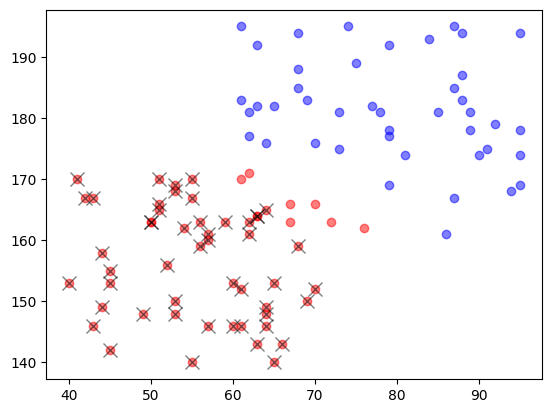

In [76]:
plt.plot([d[0] for d in group0],
        [d[1] for d in group0],'o',color='r',alpha=0.5)
plt.plot([d[0] for d in group1],
        [d[1] for d in group1],'o',color='b',alpha=0.5)
plt.plot([d[0] for d in data[::2]],
        [d[1] for d in data[::2]],'x',color='k',alpha=0.5,markersize=10)

# 4. api(sklearn)를 이용한 군집화
- sklearn : 머신러닝 패키지
    - 예측모델 : 분류, 회귀, 군집분석 - fit(학습), predict(예측)
    - 변환모델 : 전처리시 사용   ex.스케일 조정 - fit(학습),  transform(변환함수),  fit_transform(학습 -> 변환)

In [ ]:
# 군집 분석 라이브러리가 경고 메세지(joblib 충돌) 출력할 경우
# import os
# os.environ['OMP_NUM_THREADS'] = '1'

In [82]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2,  # 2개 그룹으로 군집
              init='random',  # 초기 기준점을 random하게 init='k-means++'
              n_init=10,      # 10번 실행
              random_state=7) # random 결과를 일관적으로 맞추기 위한 seed 
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [83]:
# 기준점(중심점)
model.cluster_centers_

array([[ 78.90909091, 181.02272727],
       [ 56.64285714, 157.375     ]])

In [84]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [86]:
group0 = data[model.labels_ == 0]
group1 = data[model.labels_ == 1]

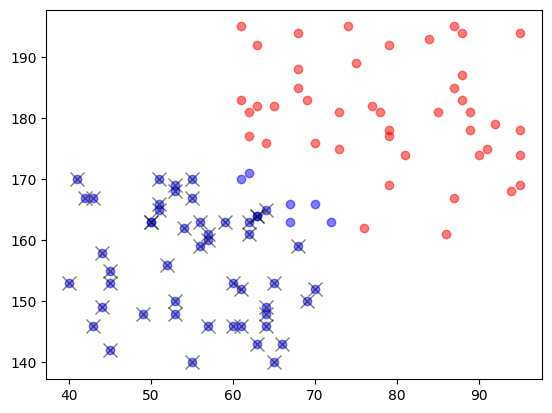

In [87]:
plt.plot([d[0] for d in group0],
        [d[1] for d in group0],'o',color='r',alpha=0.5)
plt.plot([d[0] for d in group1],
        [d[1] for d in group1],'o',color='b',alpha=0.5)
plt.plot([d[0] for d in data[::2]],
        [d[1] for d in data[::2]],'x',color='k',alpha=0.5,markersize=10)